<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/Spatial_GNNDroughtPrediction200k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km.csv")

In [4]:
processed_dataset

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
0,0,287,287,201505,15.271,-17.068,297.249,291.684,304.108,292.141,...,1557.17,1132.95,303.650,3.938450e-06,-1.030740,-0.937773,2015-05-01,2015,5,0.148753
1,1,1125,287,201506,15.271,-17.068,298.479,292.966,307.924,293.551,...,1507.68,1116.97,302.250,3.481040e-06,-1.983540,-1.747770,2015-06-01,2015,6,0.169415
2,2,1963,287,201507,15.271,-17.068,300.038,296.358,304.813,295.583,...,1814.58,1368.95,302.435,1.429650e-05,-0.773948,-1.519480,2015-07-01,2015,7,0.229645
3,3,2801,287,201508,15.271,-17.068,300.277,297.167,304.959,297.178,...,3233.08,2475.59,303.790,6.708030e-05,1.125420,0.176900,2015-08-01,2015,8,0.226260
4,4,3639,287,201509,15.271,-17.068,300.453,296.962,304.370,297.498,...,3829.11,2849.36,304.714,1.539020e-06,0.593335,0.588032,2015-09-01,2015,9,0.155879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,83575,79997,387,202304,11.678,51.204,299.834,294.269,306.253,293.895,...,1735.93,1300.87,303.895,1.717400e-06,1.432950,0.334410,2023-04-01,2023,4,0.147807
83576,83576,80835,387,202305,11.678,51.204,301.408,294.354,307.231,295.266,...,1694.04,1210.34,305.717,4.468630e-07,0.317675,0.610513,2023-05-01,2023,5,0.147549
83577,83577,81673,387,202306,11.678,51.204,302.933,296.843,309.328,292.453,...,1555.81,1144.27,305.315,3.380950e-08,0.585810,0.947582,2023-06-01,2023,6,0.146490
83578,83578,82511,387,202307,11.678,51.204,304.032,299.200,309.950,290.167,...,1414.49,1043.21,303.643,4.085260e-06,1.418990,0.833237,2023-07-01,2023,7,0.148758


In [5]:
import networkx as nx
from geopy.distance import geodesic

In [6]:
sort_processed_dataset = processed_dataset.sort_values(by=["Month",'Lat','Lon'])
sort_processed_dataset

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
36896,36896,832,832,201505,-33.238,18.865,288.610,280.177,303.344,282.436,...,3183.19,1579.13,284.951,0.000036,-0.646173,-1.422560,2015-05-01,2015,5,0.251283
40496,40496,833,833,201505,-33.238,20.661,286.602,277.234,299.677,276.598,...,2342.47,1065.27,283.865,0.000017,-0.060123,-0.716875,2015-05-01,2015,5,0.208038
44196,44196,834,834,201505,-33.238,22.458,287.657,277.419,300.492,277.622,...,2539.90,1144.62,284.058,0.000023,-0.395736,-0.197511,2015-05-01,2015,5,0.236802
47996,47996,835,835,201505,-33.238,24.255,288.242,279.026,302.691,278.494,...,3223.51,1457.66,284.624,0.000024,-0.034155,1.049300,2015-05-01,2015,5,0.201857
51696,51696,836,836,201505,-33.238,26.051,288.644,279.236,303.139,281.658,...,5622.32,2827.40,287.150,0.000034,-0.772399,0.596915,2015-05-01,2015,5,0.235473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16798,16798,82962,0,202308,36.831,2.695,299.798,292.088,308.027,292.618,...,2353.40,1375.94,300.270,0.000044,-3.007470,-2.283540,2023-08-01,2023,8,0.100696
18598,18598,82963,1,202308,36.831,4.492,298.952,290.859,308.724,290.093,...,2415.50,1451.00,299.869,0.000031,-2.610690,-1.962180,2023-08-01,2023,8,0.165674
20498,20498,82964,2,202308,36.831,6.288,299.179,290.378,310.346,290.137,...,2602.52,1682.16,299.597,0.000027,-2.657440,-1.154330,2023-08-01,2023,8,0.158589
22398,22398,82965,3,202308,36.831,8.085,299.810,291.612,314.138,290.430,...,2247.70,1509.14,299.815,0.000023,-1.496310,-1.311100,2023-08-01,2023,8,0.162999


In [83]:
three_month_dataset = sort_processed_dataset[sort_processed_dataset["Month"].isin([201505, 201506, 201507])]

In [84]:
three_month_dataset

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
36896,36896,832,832,201505,-33.238,18.865,288.610,280.177,303.344,282.436,...,3183.19,1579.13,284.951,0.000036,-0.646173,-1.422560,2015-05-01,2015,5,0.251283
40496,40496,833,833,201505,-33.238,20.661,286.602,277.234,299.677,276.598,...,2342.47,1065.27,283.865,0.000017,-0.060123,-0.716875,2015-05-01,2015,5,0.208038
44196,44196,834,834,201505,-33.238,22.458,287.657,277.419,300.492,277.622,...,2539.90,1144.62,284.058,0.000023,-0.395736,-0.197511,2015-05-01,2015,5,0.236802
47996,47996,835,835,201505,-33.238,24.255,288.242,279.026,302.691,278.494,...,3223.51,1457.66,284.624,0.000024,-0.034155,1.049300,2015-05-01,2015,5,0.201857
51696,51696,836,836,201505,-33.238,26.051,288.644,279.236,303.139,281.658,...,5622.32,2827.40,287.150,0.000034,-0.772399,0.596915,2015-05-01,2015,5,0.235473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16701,16701,1676,0,201507,36.831,2.695,300.353,293.030,309.171,292.229,...,2513.70,1591.47,300.604,0.000001,-2.261410,-1.873510,2015-07-01,2015,7,0.121016
18501,18501,1677,1,201507,36.831,4.492,299.238,291.321,308.161,289.708,...,2451.00,1597.00,300.809,0.000003,-1.836050,-1.868080,2015-07-01,2015,7,0.178833
20401,20401,1678,2,201507,36.831,6.288,299.959,290.885,311.877,289.940,...,2583.16,1696.82,300.668,0.000004,-1.862700,-1.576210,2015-07-01,2015,7,0.175729
22301,22301,1679,3,201507,36.831,8.085,300.016,291.303,312.436,290.518,...,2344.65,1654.86,301.121,0.000007,-1.020560,-1.140980,2015-07-01,2015,7,0.187649


In [ ]:
dataset_subset = sort_processed_dataset[sort_processed_dataset["Month"] == 201505]

In [ ]:
dataset_subset

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
36896,36896,832,832,201505,-33.238,18.865,288.610,280.177,303.344,282.436,...,3183.19,1579.13,284.951,0.000036,-0.646173,-1.422560,2015-05-01,2015,5,0.251283
40496,40496,833,833,201505,-33.238,20.661,286.602,277.234,299.677,276.598,...,2342.47,1065.27,283.865,0.000017,-0.060123,-0.716875,2015-05-01,2015,5,0.208038
44196,44196,834,834,201505,-33.238,22.458,287.657,277.419,300.492,277.622,...,2539.90,1144.62,284.058,0.000023,-0.395736,-0.197511,2015-05-01,2015,5,0.236802
47996,47996,835,835,201505,-33.238,24.255,288.242,279.026,302.691,278.494,...,3223.51,1457.66,284.624,0.000024,-0.034155,1.049300,2015-05-01,2015,5,0.201857
51696,51696,836,836,201505,-33.238,26.051,288.644,279.236,303.139,281.658,...,5622.32,2827.40,287.150,0.000034,-0.772399,0.596915,2015-05-01,2015,5,0.235473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16699,16699,0,0,201505,36.831,2.695,292.897,284.173,306.818,286.393,...,3372.96,2213.50,296.440,0.000012,-1.691230,-1.961670,2015-05-01,2015,5,0.116577
18499,18499,1,1,201505,36.831,4.492,291.509,281.289,307.803,284.749,...,3204.50,2178.00,296.346,0.000011,-1.675480,-1.874810,2015-05-01,2015,5,0.188295
20399,20399,2,2,201505,36.831,6.288,291.982,280.979,310.320,285.078,...,3771.80,2545.19,295.924,0.000008,-1.147220,-1.466250,2015-05-01,2015,5,0.164540
22299,22299,3,3,201505,36.831,8.085,292.651,282.872,311.148,285.349,...,3253.83,2270.80,296.594,0.000002,-0.818641,-1.169820,2015-05-01,2015,5,0.166775


In [15]:
Spatial_subset_graph = nx.Graph()

In [ ]:
dataset_subset = dataset_subset.sort_values(by=['Lat','Lon'])

In [16]:
# Add nodes with features
for index, row in dataset_subset.iterrows():
    Spatial_subset_graph.add_node(index, **row[['Lat', 'Lon', 'temperature_2m', 'temperature_2m_min',
                             'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
                             'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
                             'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
                             'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
                             'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01']].to_dict())

print("finished creating node features")

finished creating node features


In [17]:
curLon = 0
curLat = 0
prevNode = 0

#Add east-west edges
dataset_subset = dataset_subset.sort_values(by=['Lat','Lon'])

for i, row_i in dataset_subset.iterrows():
  if curLat == row_i["Lat"]:
    Spatial_subset_graph.add_edge(prevNode, i)
    prevNode = i
  else:
    curLat = row_i["Lat"]
    prevNode = i

#Add north-south edges
dataset_subset = dataset_subset.sort_values(by=['Lon','Lat'])

for i, row_i in dataset_subset.iterrows():
  if curLat == row_i["Lon"]:
    Spatial_subset_graph.add_edge(prevNode, i)
    prevNode = i
  else:
    curLat = row_i["Lon"]
    prevNode = i


In [18]:
display_a_to_b_nodes(Spatial_subset_graph, 0, 30)

NameError: ignored

**Spatial-Temporal Graph**

In [70]:
Spatial_temporal_graph = nx.Graph()

In [91]:
Spatial_temporal_graph_test = nx.Graph()

In [92]:
for i in range(len(three_month_dataset)):
      Spatial_temporal_graph_test.add_node(index, **three_month_dataset.iloc[i][['Lat', 'Lon', 'temperature_2m', 'temperature_2m_min',
                             'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
                             'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
                             'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
                             'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
                             'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01']].to_dict())
      print(str(i))

print("finished creating node features")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [71]:
# Add nodes with features
for index, row in sort_processed_dataset.iterrows():
    Spatial_temporal_graph.add_node(index, **row[['Lat', 'Lon', 'temperature_2m', 'temperature_2m_min',
                             'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
                             'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
                             'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
                             'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
                             'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01']].to_dict())

print("finished creating node features")

finished creating node features


In [ ]:
colors =[
    'aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure',
    'beige', 'bisque', 'black', 'blanchedalmond', 'blue',
    'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse',
    'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson',
    'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray',
    'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen',
    'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen',
    'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet',
    'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue',
    'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro',
    'ghostwhite', 'gold', 'goldenrod', 'gray', 'green',
    'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred',
    'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush',
    'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan',
    'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink',
    'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey',
    'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen',
    'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid',
    'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise',
    'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin'
]

# Assuming 'sort_processed_dataset' has a 'Month' column
unique_months = sort_processed_dataset['Month'].unique()
month_color_map = {}

for i, month in enumerate(unique_months):
    month_color_map[month] = colors[i % len(colors)]

for index, row in sort_processed_dataset.iterrows():
    node_color = month_color_map[row['Month']]
    Spatial_temporal_graph.add_node(index, color=node_color, **row[['Lat', 'Lon', 'temperature_2m', 'temperature_2m_min',
                             'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
                             'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
                             'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
                             'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
                             'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01']].to_dict())

print("finished creating node features")

finished creating node features


In [65]:
unique_list_of_months = list(set(sort_processed_dataset["Month"]))
unique_list_of_months.sort()
unique_list_of_months_test = unique_list_of_months[0:3]

[201505, 201506, 201507]

In [11]:
import numpy as np
import math

def EuclideanDistance(x1, x2, y1, y2):
  return math.pow((math.pow((x1-x2),2)+math.pow((y1-y2),2)), 1/2)

In [12]:
total_index=0

for month in unique_list_of_months:
  dataset_subset = sort_processed_dataset[sort_processed_dataset["Month"] == month]

  for i, row_i in dataset_subset.iterrows():
    for j, row_j in dataset_subset.iterrows():
      if EuclideanDistance(row_i["Lat"], row_i["Lon"], row_j["Lat"], row_j["Lon"]) <= 250:
        Spatial_temporal_graph.add_edge(j+total_index, i+total_index)

  total_index = len(dataset_subset) + total_index
  print("nodes processed: " + str(total_index))

KeyboardInterrupt: ignored

In [41]:
dataset_subset

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
99,99,83249,287,202308,15.271,-17.068,300.694,297.191,304.767,297.173,...,3688.25,2774.800,303.145,1.863120e-05,0.590848,-0.177008,2023-08-01,2023,8,0.241853
199,199,83315,353,202308,11.678,-15.271,299.808,297.008,303.979,297.272,...,5548.48,4151.100,301.612,6.895430e-05,0.202160,-0.440952,2023-08-01,2023,8,0.494745
299,299,83282,320,202308,13.475,-15.271,300.340,296.425,306.293,297.179,...,6412.18,4567.170,302.735,4.085480e-05,0.017055,-0.413505,2023-08-01,2023,8,0.284643
399,399,83250,288,202308,15.271,-15.271,301.713,295.652,310.049,296.353,...,4785.86,3500.870,304.253,2.542490e-05,0.255993,-0.931372,2023-08-01,2023,8,0.143244
499,499,83217,255,202308,17.068,-15.271,302.763,294.968,312.539,295.420,...,2632.86,1872.920,305.665,1.350700e-05,-0.515056,-1.182390,2023-08-01,2023,8,0.093428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83179,83179,83421,459,202308,8.085,49.407,301.267,295.332,308.758,289.434,...,1489.86,1084.490,302.024,6.550340e-07,-1.878460,-1.617230,2023-08-01,2023,8,0.091263
83279,83279,83385,423,202308,9.881,49.407,300.419,294.015,306.637,286.041,...,1403.91,1038.670,302.655,5.138590e-07,1.622190,1.952580,2023-08-01,2023,8,0.099182
83379,83379,83348,386,202308,11.678,49.407,306.196,300.897,311.153,289.675,...,1650.33,1187.100,305.441,1.044440e-06,4.448400,4.509740,2023-08-01,2023,8,0.146285
83479,83479,83386,424,202308,9.881,51.204,300.222,296.370,305.795,291.744,...,1162.77,898.003,302.263,7.311530e-08,0.581537,0.897131,2023-08-01,2023,8,0.159424


In [95]:
#Create Spatial Edges
total_index=0

for month in unique_list_of_months_test:
  dataset_subset = sort_processed_dataset[sort_processed_dataset["Month"] == month]
  curLat = 0
  prevNode = 0

  #Add east-west edges
  dataset_subset = dataset_subset.sort_values(by=['Lat','Lon'])

  for i in range(len(dataset_subset)):
    if curLat == dataset_subset.iloc[i]["Lat"]:
      Spatial_temporal_graph_test.add_edge(prevNode, i+total_index)
      prevNode = i+total_index
    else:
      curLat = dataset_subset.iloc[i]["Lat"]
      prevNode = i+total_index

  #Add north-south edges
  dataset_subset = dataset_subset.sort_values(by=['Lon','Lat'])
  prevNode = 0
  curLon = 0

  for i in range(len(dataset_subset)):
    if curLon == dataset_subset.iloc[i]["Lon"]:
      Spatial_temporal_graph_test.add_edge(prevNode, i+total_index)
      print(i)
      print("edge created: "+str(prevNode)+" "+str(i+total_index))
      prevNode = i+total_index
    else:
      curLon = dataset_subset.iloc[i]["Lon"]
      prevNode = i+total_index

  total_index = len(dataset_subset) + total_index
  print("nodes processed: " + str(total_index))

2
edge created: 1 2
3
edge created: 2 3
4
edge created: 3 4
5
edge created: 4 5
6
edge created: 5 6
7
edge created: 6 7
8
edge created: 7 8
9
edge created: 8 9
11
edge created: 10 11
12
edge created: 11 12
13
edge created: 12 13
14
edge created: 13 14
15
edge created: 14 15
16
edge created: 15 16
17
edge created: 16 17
18
edge created: 17 18
19
edge created: 18 19
21
edge created: 20 21
22
edge created: 21 22
23
edge created: 22 23
24
edge created: 23 24
25
edge created: 24 25
26
edge created: 25 26
27
edge created: 26 27
28
edge created: 27 28
29
edge created: 28 29
30
edge created: 29 30
31
edge created: 30 31
33
edge created: 32 33
34
edge created: 33 34
35
edge created: 34 35
36
edge created: 35 36
37
edge created: 36 37
38
edge created: 37 38
39
edge created: 38 39
40
edge created: 39 40
41
edge created: 40 41
42
edge created: 41 42
43
edge created: 42 43
44
edge created: 43 44
45
edge created: 44 45
46
edge created: 45 46
48
edge created: 47 48
49
edge created: 48 49
50
edge crea

In [66]:
#Create Spatial Edges
total_index=0

for month in unique_list_of_months:
  dataset_subset = sort_processed_dataset[sort_processed_dataset["Month"] == month]
  curLat = 0
  prevNode = 0

  #Add east-west edges
  dataset_subset = dataset_subset.sort_values(by=['Lat','Lon'])

  for i, row_i in dataset_subset.iterrows():
    if curLat == row_i["Lat"]:
      Spatial_temporal_graph.add_edge(prevNode, i+total_index)
      prevNode = i+total_index
    else:
      curLat = row_i["Lat"]
      prevNode = i+total_index

  #Add north-south edges
  dataset_subset = dataset_subset.sort_values(by=['Lon','Lat'])
  prevNode = 0
  curLon = 0

  for i, row_i in dataset_subset.iterrows():
    if curLon == row_i["Lon"]:
      Spatial_temporal_graph.add_edge(prevNode, i+total_index)
      print(i)
      print("edge created: "+str(prevNode)+" "+str(i+total_index))
      prevNode = i+total_index
    else:
      curLon = row_i["Lon"]
      prevNode = i+total_index

  total_index = len(dataset_subset) + total_index
  print("nodes processed: " + str(total_index))

292
edge created: 192 292
392
edge created: 292 392
492
edge created: 392 492
592
edge created: 492 592
692
edge created: 592 692
792
edge created: 692 792
892
edge created: 792 892
992
edge created: 892 992
1192
edge created: 1092 1192
1292
edge created: 1192 1292
1392
edge created: 1292 1392
1492
edge created: 1392 1492
1592
edge created: 1492 1592
1692
edge created: 1592 1692
1792
edge created: 1692 1792
1892
edge created: 1792 1892
1992
edge created: 1892 1992
2192
edge created: 2092 2192
2292
edge created: 2192 2292
2392
edge created: 2292 2392
2492
edge created: 2392 2492
2592
edge created: 2492 2592
2692
edge created: 2592 2692
2792
edge created: 2692 2792
2892
edge created: 2792 2892
2992
edge created: 2892 2992
3092
edge created: 2992 3092
3192
edge created: 3092 3192
3392
edge created: 3292 3392
3492
edge created: 3392 3492
3592
edge created: 3492 3592
3692
edge created: 3592 3692
3792
edge created: 3692 3792
3892
edge created: 3792 3892
3992
edge created: 3892 3992
4092
edge

In [ ]:
len(Spatial_temporal_graph)

83580

In [ ]:
len(node_colors)

118060

In [ ]:
node_colors[835]

'red'

In [ ]:
from collections import Counter

frequency_distribution = Counter(node_colors)

distribution_dict = dict(frequency_distribution)

print(frequency_distribution)
print(distribution_dict)

Counter({None: 34480, 'aliceblue': 836, 'antiquewhite': 836, 'aqua': 836, 'aquamarine': 836, 'azure': 836, 'beige': 836, 'bisque': 836, 'black': 836, 'blanchedalmond': 836, 'blue': 836, 'blueviolet': 836, 'brown': 836, 'burlywood': 836, 'cadetblue': 836, 'chartreuse': 836, 'chocolate': 836, 'coral': 836, 'cornflowerblue': 836, 'cornsilk': 836, 'crimson': 836, 'cyan': 836, 'darkblue': 836, 'darkcyan': 836, 'darkgoldenrod': 836, 'darkgray': 836, 'darkgreen': 836, 'darkgrey': 836, 'darkkhaki': 836, 'darkmagenta': 836, 'darkolivegreen': 836, 'darkorange': 836, 'darkorchid': 836, 'darkred': 836, 'darksalmon': 836, 'darkseagreen': 836, 'darkslateblue': 836, 'darkslategray': 836, 'darkslategrey': 836, 'darkturquoise': 836, 'darkviolet': 836, 'deeppink': 836, 'deepskyblue': 836, 'dimgray': 836, 'dimgrey': 836, 'dodgerblue': 836, 'firebrick': 836, 'floralwhite': 836, 'forestgreen': 836, 'fuchsia': 836, 'gainsboro': 836, 'ghostwhite': 836, 'gold': 836, 'goldenrod': 836, 'gray': 836, 'green': 836

In [73]:
Spatial_temporal_graph.edges()

EdgeView([(2000, 1999), (2000, 2001), (1000, 999), (1000, 1001), (2100, 2099), (2100, 2101), (100, 99), (100, 101), (1100, 1099), (1100, 1101), (2200, 2199), (2200, 2201), (200, 199), (200, 201), (1200, 1199), (1200, 1201), (2300, 2299), (2300, 2301), (0, 1), (300, 299), (300, 301), (1300, 1299), (1300, 1301), (2400, 2399), (2400, 2401), (400, 399), (400, 401), (1400, 1399), (1400, 1401), (2500, 2499), (2500, 2501), (500, 499), (500, 501), (1500, 1499), (1500, 1501), (600, 599), (600, 601), (1600, 1599), (1600, 1601), (700, 699), (700, 701), (1700, 1699), (1700, 1701), (800, 799), (800, 801), (1800, 1799), (1800, 1801), (1900, 1899), (1900, 1901), (900, 899), (900, 901), (2001, 2002), (1001, 1002), (2101, 2102), (101, 102), (1101, 1102), (2201, 2202), (201, 202), (1201, 1202), (2301, 2302), (1, 2), (301, 302), (1301, 1302), (2401, 2402), (401, 402), (1401, 1402), (2501, 2502), (501, 502), (1501, 1502), (601, 602), (1601, 1602), (701, 702), (1701, 1702), (801, 802), (1801, 1802), (1901,

In [80]:
list(Spatial_temporal_graph.nodes())[0:10]

[36896, 40496, 44196, 47996, 51696, 55396, 36996, 40596, 44296, 48096]

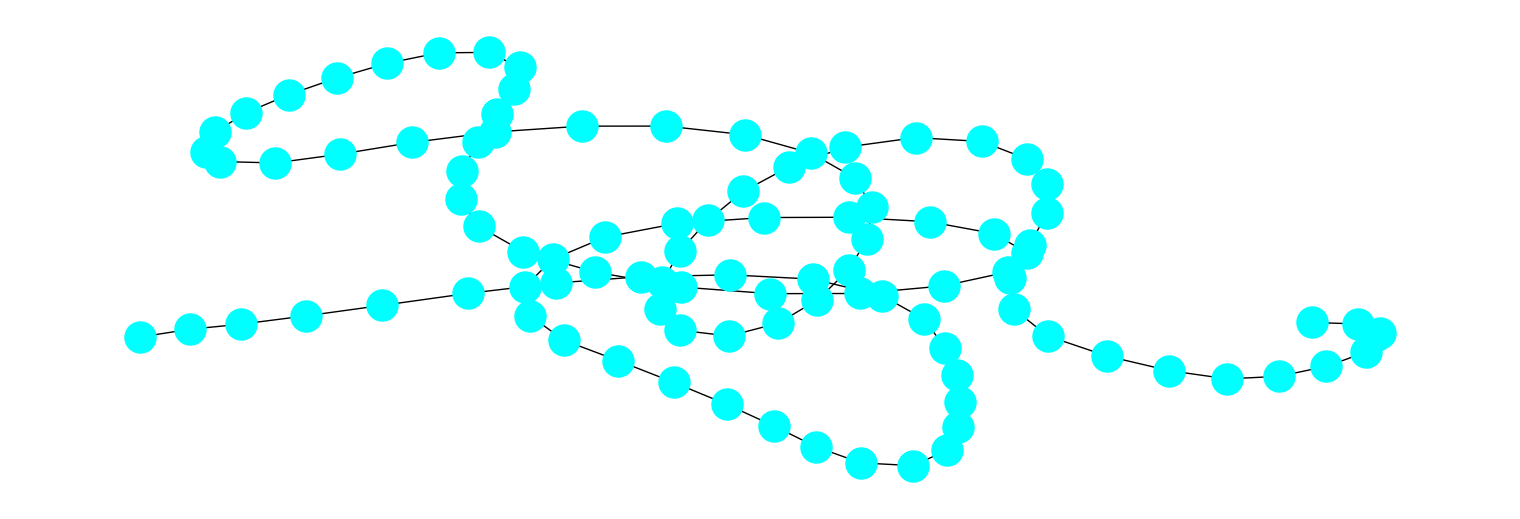

In [98]:
# node_colors = []

# for node in Spatial_temporal_graph.nodes:
#     color = Spatial_temporal_graph.nodes[node].get('color')
#     node_colors.append(color)

display_a_to_b_nodes(Spatial_temporal_graph_test, 2000, 2100, "Lat")

In [ ]:
# Precompute subsets for each month
month_subsets = {month: sort_processed_dataset[sort_processed_dataset["Month"] == month] for month in unique_list_of_months}

total_index = 0

for i, month in enumerate(unique_list_of_months[:-1]):
    dataset_subset_1 = month_subsets[month]
    dataset_subset_2 = month_subsets[unique_list_of_months[i+1]]

    # Convert DataFrames to list of tuples for faster iteration
    rows_1 = [(idx, lon, lat) for idx, lon, lat in dataset_subset_1[['Lon', 'Lat']].itertuples()]
    rows_2 = [(idx, lon, lat) for idx, lon, lat in dataset_subset_2[['Lon', 'Lat']].itertuples()]

    # Create a dictionary for spatial-temporal pairs
    location_pairs = {(lon, lat): idx for idx, lon, lat in rows_1}

    # Process the pairs
    for idx, lon, lat in rows_2:
        if (lon, lat) in location_pairs:
            Spatial_temporal_graph.add_edge(total_index + location_pairs[(lon, lat)], total_index + len(dataset_subset_1) + idx)

    print(f"nodes processed: {total_index}")
    total_index += len(dataset_subset_1)

nodes processed: 0
nodes processed: 836
nodes processed: 1672
nodes processed: 2508
nodes processed: 3344
nodes processed: 4180
nodes processed: 5016
nodes processed: 5852
nodes processed: 6688
nodes processed: 7524
nodes processed: 8360
nodes processed: 9196
nodes processed: 10032
nodes processed: 10868
nodes processed: 11704
nodes processed: 12540
nodes processed: 13376
nodes processed: 14212
nodes processed: 15048
nodes processed: 15884
nodes processed: 16720
nodes processed: 17556
nodes processed: 18392
nodes processed: 19228
nodes processed: 20064
nodes processed: 20900
nodes processed: 21736
nodes processed: 22572
nodes processed: 23408
nodes processed: 24244
nodes processed: 25080
nodes processed: 25916
nodes processed: 26752
nodes processed: 27588
nodes processed: 28424
nodes processed: 29260
nodes processed: 30096
nodes processed: 30932
nodes processed: 31768
nodes processed: 32604
nodes processed: 33440
nodes processed: 34276
nodes processed: 35112
nodes processed: 35948
node

In [ ]:
node_colors = [Spatial_temporal_graph.nodes[node]['color'] for node in Spatial_temporal_graph.nodes]

display_a_to_b_nodes(Spatial_temporal_graph, 0, 110, "Lat", node_colors)

KeyError: ignored

In [ ]:
#Create Temporal Edges
total_index=0

for i, month in enumerate(unique_list_of_months[:-1]):
  dataset_subset_1 = sort_processed_dataset[sort_processed_dataset["Month"] == month]
  dataset_subset_2 = sort_processed_dataset[sort_processed_dataset["Month"] == unique_list_of_months[i+1]]

  for i, row_i in dataset_subset_1.iterrows():
      for j, row_j in dataset_subset_2.iterrows():
        if row_j["Lon"] == row_i["Lon"] and row_j["Lat"] == row_i["Lat"]:
          Spatial_temporal_graph.add_edge(total_index+i, total_index+len(dataset_subset_1)+j)

  print("nodes processed: "+str(total_index))
  total_index = total_index+len(dataset_subset_1)

nodes processed: 0
nodes processed: 836


KeyboardInterrupt: ignored

**Graph Display**

In [25]:
def display_a_to_b_nodes(graph, a, b, attribute_name):
    # Extract nodes from index a to b
    nodes_subset = list(graph.nodes())[a:b]

    # Create a subgraph with these nodes
    subgraph = graph.subgraph(nodes_subset)

    # Create a dictionary for node labels based on the specified attribute
    node_labels = {node: subgraph.nodes[node].get(attribute_name, '') for node in subgraph.nodes()}

    # Draw the subgraph with the linear layout
    plt.figure(figsize=(15, 5))
    nx.draw(subgraph, with_labels=True, node_color="cyan", node_size=500, edge_color='black', linewidths=1, font_size=10, labels=node_labels)
    plt.show()

In [20]:
display_a_to_b_nodes(Temporal_graph, 90, 103)

NameError: ignored

In [ ]:
#Access node attibutes for the 80th node
Temporal_graph.nodes[list(Temporal_graph.nodes())[80]]

{'Lat': -17.068,
 'Lon': 15.271,
 'temperature_2m': 297.827,
 'temperature_2m_min': 291.844,
 'temperature_2m_max': 306.671,
 'dewpoint_temperature_2m': 285.132,
 'total_precipitation_sum': 0.000353725,
 'total_precipitation_min': 0.0,
 'total_precipitation_max': 0.00018689,
 'u_component_of_wind_10m': -1.58611,
 'v_component_of_wind_10m': -3.68987,
 'surface_net_solar_radiation_sum': 464593000.0,
 'total_evaporation_sum': -0.0178993,
 'soil_moisture_am': 0.138418,
 'soil_moisture_pm': 0.131772,
 'NDVI': 2218.14,
 'EVI': 1488.29,
 'next_month_tempreature': 301.28,
 'next_month_precipitation': 3.39397e-11,
 'year': 2022,
 'month2': 1,
 'spei01': -3.79605}

**Graph Neural Network**

In [ ]:
import os
import torch
os.environ['TORCH'] = torch.__version__
os.environ['PYTHONWARNINGS'] = "ignore"
!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 101.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 40.0 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-9_efswok
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-9_efswok
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 6f5fabe08a870dd06ef9326aba811f5807620325
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.4.0-py3-none-any.whl size=1070410 sha256=cc9a7340924a77a6ac04b1cc940bd4d5df628df63b03710dbdc1c10635b49d6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-dhd47kaw/wheels/